# **Hierarchical Clustering in R**

## **1. Hierarchical Clustering of Mall Customers**

### **Importing the dataset**

In [1]:
ds = read.csv('/content/Mall_Customers.csv')
head(ds)

,CustomerID,Genre,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [2]:
ds = ds[4:5]

### **Using the dendrogram to find the optimal number of clusters**

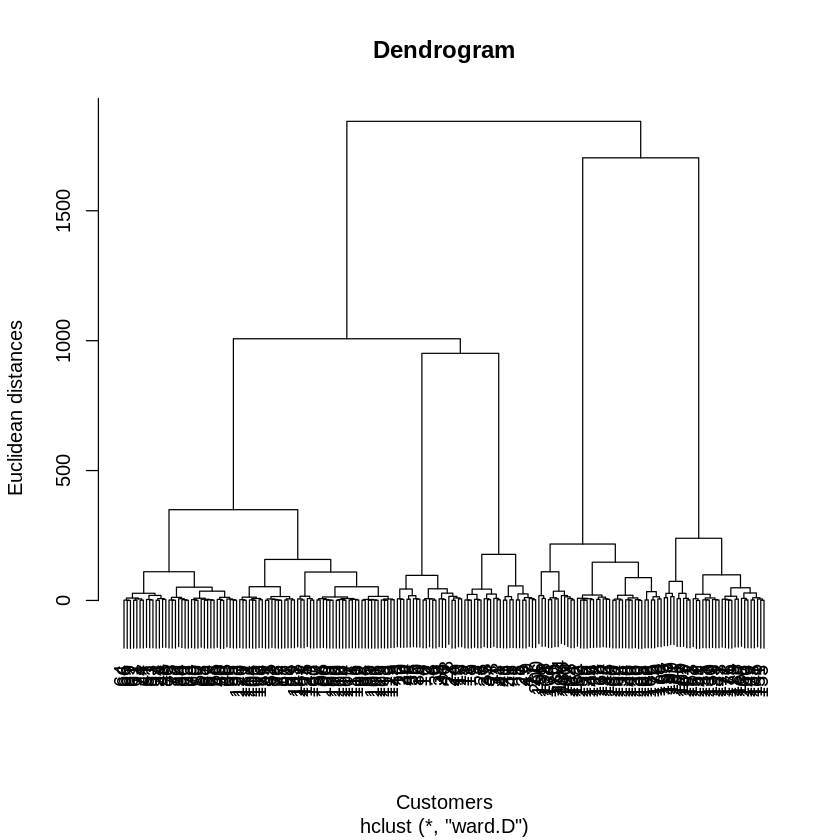

In [3]:
dendrogram = hclust(d = dist(ds, method = 'euclidean'), method = 'ward.D')
plot(dendrogram,
     main = paste('Dendrogram'),
     xlab = 'Customers',
     ylab = 'Euclidean distances')

### **Fitting Hierarchical Clustering to the dataset**

In [4]:
hc = hclust(d = dist(ds, method = 'euclidean'), method = 'ward.D')
y_hc = cutree(hc, 5)

### **Visualizing the clusters**

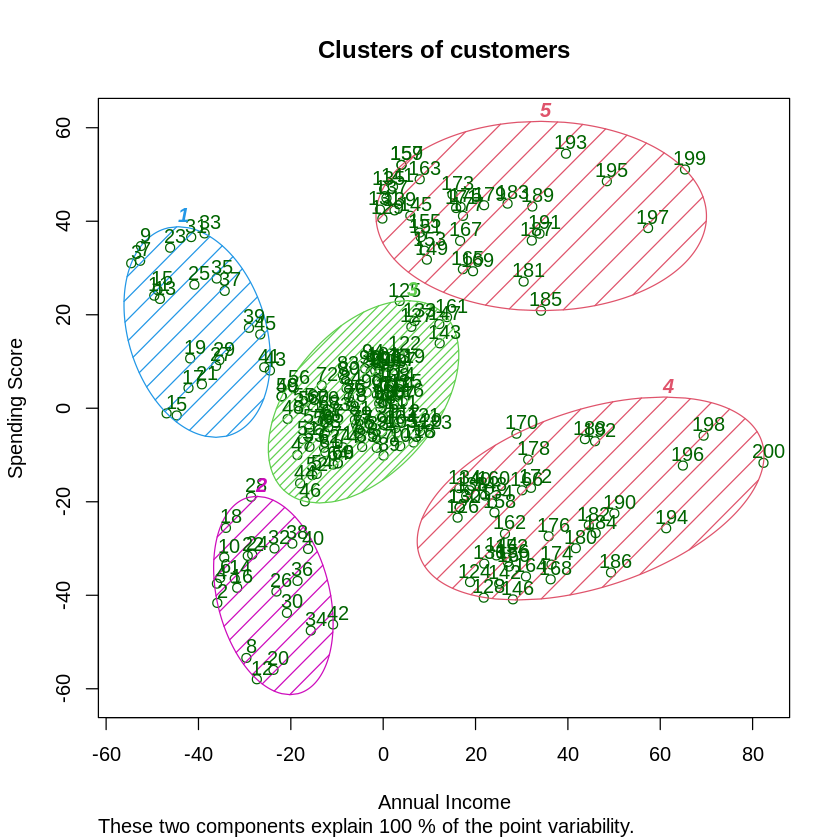

In [5]:
library(cluster)
clusplot(ds,
         y_hc,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels= 2,
         plotchar = FALSE,
         span = TRUE,
         main = paste('Clusters of customers'),
         xlab = 'Annual Income',
         ylab = 'Spending Score')

## **2. Hierarchical Clustering in R of College data**

### **Importing the dataset**

In [6]:
college = read.csv('/content/College_Data')
head(college)

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


### **Data Preprocessing**

In [7]:
summary(college)

      X               Private               Apps           Accept     
 Length:777         Length:777         Min.   :   81   Min.   :   72  
 Class :character   Class :character   1st Qu.:  776   1st Qu.:  604  
 Mode  :character   Mode  :character   Median : 1558   Median : 1110  
                                       Mean   : 3002   Mean   : 2019  
                                       3rd Qu.: 3624   3rd Qu.: 2424  
                                       Max.   :48094   Max.   :26330  
     Enroll       Top10perc       Top25perc      F.Undergrad   
 Min.   :  35   Min.   : 1.00   Min.   :  9.0   Min.   :  139  
 1st Qu.: 242   1st Qu.:15.00   1st Qu.: 41.0   1st Qu.:  992  
 Median : 434   Median :23.00   Median : 54.0   Median : 1707  
 Mean   : 780   Mean   :27.56   Mean   : 55.8   Mean   : 3700  
 3rd Qu.: 902   3rd Qu.:35.00   3rd Qu.: 69.0   3rd Qu.: 4005  
 Max.   :6392   Max.   :96.00   Max.   :100.0   Max.   :31643  
  P.Undergrad         Outstate       Room.Board       B

In [8]:
#find number of rows with missing values
sum(!complete.cases(college))

[1] 0

In [9]:
#remove rows with missing values
ds <- na.omit(ds)

In [10]:
ds = college[3:19]

In [11]:
#scale each variable to have a mean of 0 and sd of 1
ds_scaled = scale(ds)

### **Load the Necessary R Packages**

In [12]:
#library(factoextra)
install.packages('cluster')
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### **Find the Linkage Method to Use**

To perform hierarchical clustering in R, use the agnes() function from the cluster package, which uses the following syntax:

agnes(data, method)

where:

* data: Name of the dataset.
* method: The method to use to calculate dissimilarity between clusters.

To know which method will produce the best clusters, write a short function to perform hierarchical clustering using several different methods. 

Note that this function calculates the agglomerative coefficient of each method, which is metric that measures the strength of the clusters. The closer this value is to 1, the stronger the clusters.

In [13]:
#define linkage methods
m = c( "average", "single", "complete", "ward")
names(m) = c( "average", "single", "complete", "ward")

#function to compute agglomerative coefficient
ac = function(x){agnes(ds, method = x)$ac}

#calculate agglomerative coefficient for each clustering linkage method
sapply(m, ac)

average    single  complete      ward 
0.9643587 0.9389356 0.9705199 0.9904133

Ward’s minimum variance method produces the highest agglomerative coefficient, thus choosing that as the method for the final hierarchical clustering:

### **Using the dendrogram to find the optimal number of clusters**

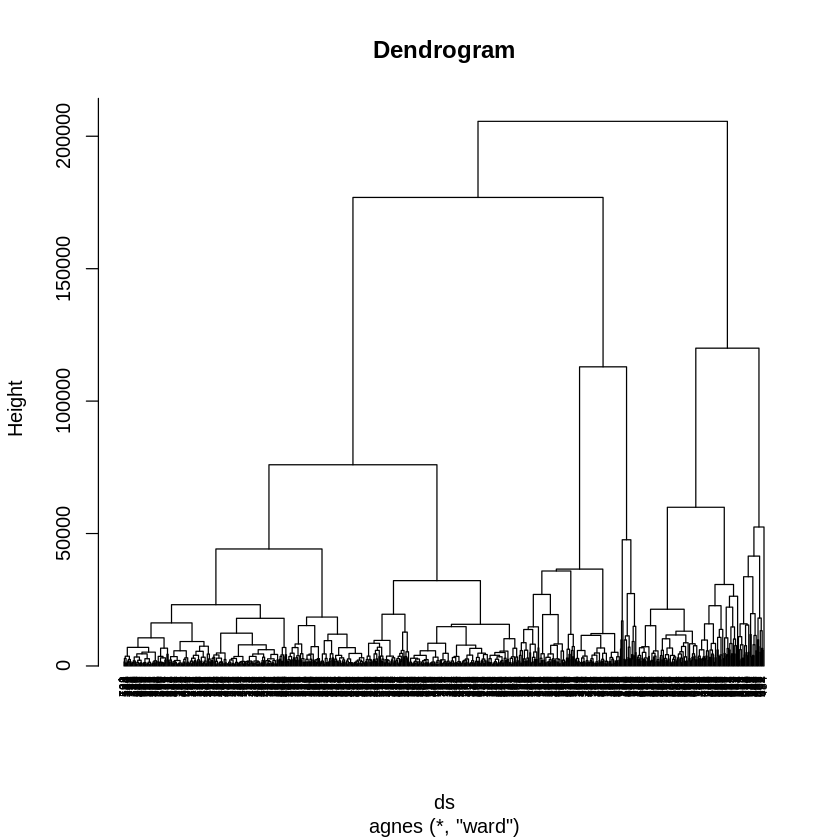

In [14]:
cluster = agnes(ds, method = "ward")

#produce dendrogram
pltree(cluster, cex = 0.6, hang = -1, main = "Dendrogram") 

Each leaf at the bottom of the dendrogram represents an observation in the original dataset. Moving up the dendrogram from the bottom, observations that are similar to each other are fused together into a branch.

### **Apply Cluster Labels to Original Dataset**

In [15]:
#compute distance matrix
d <- dist(ds, method = "euclidean")

#perform hierarchical clustering using Ward's method
final_clust <- hclust(d, method = "ward.D2" )

#cut the dendrogram into 4 clusters
groups <- cutree(final_clust, k=3)

#find number of observations in each cluster
table(groups)

groups
  1   2   3 
479 143 155 

### **Append the cluster labels  of each state back to the original dataset:**

In [16]:
#append cluster labels to original data
final_data <- cbind(college, cluster = groups)

#display first six rows of final data
head(final_data)

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,2
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,1


**Lastly, use the aggregate() function to find the mean of the variables in each cluster:**

In [17]:
#find mean values for each cluster
aggregate(final_data[3:20], by=list(cluster=final_data$cluster), mean)

cluster,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1342.912,1001.269,377.9269,22.02505,49.43006,1585.520,499.5699,9591.182,4205.491,540.2881,1303.6722,66.11482,73.71816,14.22505,21.60543,7934.739,63.87891,1
2,3498.175,1942.098,618.3566,47.84615,75.46154,2406.622,202.7063,16668.049,5390.783,563.1259,995.4545,86.73427,92.80420,10.42028,35.20280,17107.615,79.39161,2
3,7669.542,5234.084,2171.5290,25.94194,57.32903,11427.206,2556.6839,7320.600,3874.103,564.8000,1773.3548,79.90323,86.10968,17.05677,14.76774,8121.445,57.50968,3
